# 과제 제출 : VGG16 (Layer Trainable 6개)

# 최고 : 0.7843

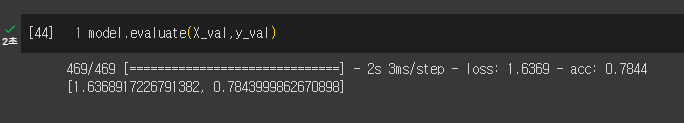

# VGG 전이학습 모델로 cifar10 분류

In [1]:
# CNN 모델 : VGG, ResNet

# Or 전이학습 (나의 데이터와 전이학습한 모델의 데이터가 흡사할 때) == Fine Tunning
# 기본적인 Fine Tunning : 전이 학습 모델의 클래스가10개이고 나는 3개를 분류하고 싶을 때 클래스만 줄이는 것이 대표적

# VGG16, VGG19를 많이 사용함

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [6]:
# imagenet 데이터로 학습된 가중치 사용 or 이전 VGG 모델로 학습했을 때 성능이 좋았다면 weights 불러서 써도됌, 단 VGG(동일한) 모델로 학습했어야함
# include_top = True , Fully Connected 까지 사용 , False 클래스 정의

vgg16 = VGG16(weights = 'imagenet',input_shape= (32,32,3),include_top=False)

58889256/58889256 [==============================] - 3s 0us/step


In [7]:
vgg16

In [11]:
# 레이어 쌓기

model = Sequential()
model.add(vgg16)
# 분류기 집어넣기
model.add(Flatten())
model.add(Dense(256,activation='relu'))
# 분류하고 싶은 클래스 갯수에 따라 10만 바꾸면 됌
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 14,848,586
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델 동결/해제

for layer in vgg16.layers:
  print(layer.trainable)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [13]:
# 레이어의 0~뒤에서 4번째 까지
for layer in vgg16.layers[:-4]:
  # 위에있는 가중치 값들은 손대지 말고
  # 그 아래에 있는 값들만 수정해서 쓴다
  layer.trainable = False

In [14]:
# feature maps 찍어보면
# 모델의 첫번째 부분에서는 전체적인 특징을 잡고
# 그 아래로 내려갈 수록 세부적인 특징을 잡는다

# 이러한 이유 때문에 마지막 부분만 재학습 시키는 것이 일반적임

# cifar 데이터 VGG16 전이학습

In [1]:
from tensorflow.keras.datasets import cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


In [2]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [3]:
import numpy as np

X_mean = np.mean(X_train,axis=(0,1,2))
X_mean

array([125.30691805, 122.95039414, 113.86538318])

In [4]:
X_std = np.std(X_train,axis=(0,1,2))
X_std

array([62.99321928, 62.08870764, 66.70489964])

In [5]:
X_train = (X_train-X_mean) / X_std
X_test = (X_test-X_mean) / X_std

In [6]:
X_train[0]

array([[[-1.05260405e+00, -9.81666336e-01, -7.62543433e-01],
        [-1.30659965e+00, -1.23936215e+00, -1.03238868e+00],
        [-1.19547658e+00, -1.20715017e+00, -1.06237148e+00],
        ...,
        [ 5.18993668e-01,  1.45752846e-01, -8.79303202e-02],
        [ 4.23745321e-01,  3.30109280e-02, -1.77878735e-01],
        [ 3.60246424e-01,  1.69049397e-02, -1.62887333e-01]],

       [[-1.73521721e+00, -1.65811785e+00, -1.40717374e+00],
        [-1.98921280e+00, -1.98023761e+00, -1.70700179e+00],
        [-1.70346776e+00, -1.85138971e+00, -1.70700179e+00],
        ...,
        [-3.66216884e-02, -5.62910640e-01, -8.82474653e-01],
        [-1.00120586e-01, -6.43440581e-01, -9.57431666e-01],
        [-5.24964129e-02, -5.79016628e-01, -8.52491848e-01]],

       [[-1.59234469e+00, -1.59369389e+00, -1.39218234e+00],
        [-1.73521721e+00, -1.86749569e+00, -1.70700179e+00],
        [-1.21135130e+00, -1.54537593e+00, -1.58707057e+00],
        ...,
        [-1.15995311e-01, -6.27334593e-01,

In [7]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train , y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=100)

In [8]:
X_train.shape , X_val.shape

((35000, 32, 32, 3), (15000, 32, 32, 3))

In [9]:
y_train.shape , y_val.shape

((35000, 1), (15000, 1))

In [10]:
y_train[:5]

array([[4],
       [2],
       [9],
       [7],
       [6]], dtype=uint8)

In [11]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([3526, 3515, 3454, 3483, 3556, 3487, 3494, 3481, 3500, 3504]))

# 과제 Cifar10 데이터 VGG16 전이학습 분류

### 표준편차 전처리 X

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [13]:
vgg16 = VGG16(weights='imagenet',input_shape=(32,32,3),include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
vgg16

In [15]:
for layer in vgg16.layers[:-6]:
  # 위에있는 가중치 값들은 손대지 말고
  # 그 아래에 있는 값들만 수정해서 쓴다
  layer.trainable = False

In [19]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)               

In [20]:
model.compile(optimizer=Adam(lr=1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [21]:
history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1094/1094 [==============================] - 19s 6ms/step - loss: 1.5142 - acc: 0.4395
Epoch 2/50
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0058 - acc: 0.6709
Epoch 3/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.8589 - acc: 0.7191
Epoch 4/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.7609 - acc: 0.7510
Epoch 5/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.6900 - acc: 0.7749
Epoch 6/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.6277 - acc: 0.7962
Epoch 7/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.5702 - acc: 0.8153
Epoch 8/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.5396 - acc: 0.8249
Epoch 9/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.5064 - acc: 0.8374
Epoch 10/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.4507 - acc: 0.8535
Epoch 11/50
1094/1094 [=====

In [24]:
model.evaluate(X_val,y_val)

469/469 [==============================] - 2s 3ms/step - loss: 1.3122 - acc: 0.7864


[1.3121669292449951, 0.7864000201225281]

### 표준편차 전처리 O

In [28]:
from tensorflow.keras.datasets import cifar10

(X_train,y_train),(X_test,y_test) = cifar10.load_data()
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [29]:
import numpy as np

X_mean = np.mean(X_train,axis=(0,1,2))
X_mean

array([125.30691805, 122.95039414, 113.86538318])

In [30]:
X_std = np.std(X_train,axis=(0,1,2))
X_std

array([62.99321928, 62.08870764, 66.70489964])

In [31]:
X_train = (X_train-X_mean) / X_std
X_test = (X_test-X_mean) / X_std

In [32]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train , y_val = train_test_split(X_train,y_train,test_size=0.3,random_state=100)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16

In [34]:
vgg16 = VGG16(weights='imagenet',input_shape=(32,32,3),include_top=False)

In [35]:
for layer in vgg16.layers[:-6]:
  # 위에있는 가중치 값들은 손대지 말고
  # 그 아래에 있는 값들만 수정해서 쓴다
  layer.trainable = False

In [36]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)               

In [38]:
model.compile(optimizer=Adam(lr=1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [39]:
history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1094/1094 [==============================] - 10s 6ms/step - loss: 1.3754 - acc: 0.5161
Epoch 2/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.8976 - acc: 0.7142
Epoch 3/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.7699 - acc: 0.7577
Epoch 4/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.6960 - acc: 0.7800
Epoch 5/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.6337 - acc: 0.7987
Epoch 6/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.5798 - acc: 0.8152
Epoch 7/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.5397 - acc: 0.8282
Epoch 8/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.5033 - acc: 0.8374
Epoch 9/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.4655 - acc: 0.8511
Epoch 10/50
1094/1094 [==============================] - 6s 6ms/step - loss: 0.4376 - acc: 0.8611
Epoch 11/50
1094/1094 [=====

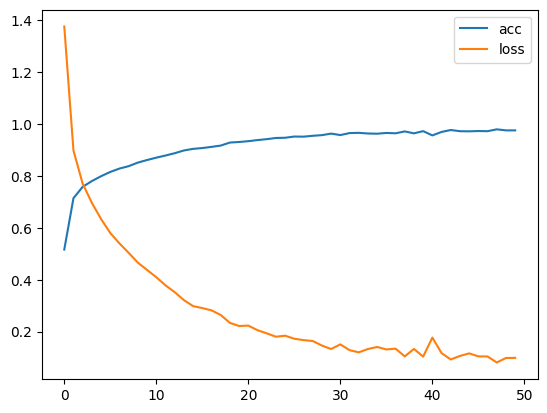

In [43]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']


plt.plot(range(len(acc)),acc,label='acc')
plt.plot(range(len(loss)),loss,label='loss')
plt.legend()

In [44]:
model.evaluate(X_val,y_val)

469/469 [==============================] - 2s 3ms/step - loss: 1.6369 - acc: 0.7844


[1.6368917226791382, 0.7843999862670898]

### 레이어 갯수 3개

In [70]:
vgg16 = VGG16(weights='imagenet',input_shape=(32,32,3),include_top=False)

In [71]:
for layer in vgg16.layers[:-3]:
  layer.trainable = False

In [72]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [73]:
model.compile(optimizer=Adam(lr=1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [74]:
history = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1094/1094 [==============================] - 7s 5ms/step - loss: 1.0689 - acc: 0.6365
Epoch 2/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8165 - acc: 0.7223
Epoch 3/10
1094/1094 [==============================] - 5s 4ms/step - loss: 0.7164 - acc: 0.7527
Epoch 4/10
1094/1094 [==============================] - 5s 4ms/step - loss: 0.6359 - acc: 0.7802
Epoch 5/10
1094/1094 [==============================] - 5s 4ms/step - loss: 0.5604 - acc: 0.8052
Epoch 6/10
1094/1094 [==============================] - 5s 4ms/step - loss: 0.4910 - acc: 0.8284
Epoch 7/10
1094/1094 [==============================] - 5s 4ms/step - loss: 0.4341 - acc: 0.8480
Epoch 8/10
1094/1094 [==============================] - 5s 4ms/step - loss: 0.3745 - acc: 0.8685
Epoch 9/10
1094/1094 [==============================] - 5s 5ms/step - loss: 0.3299 - acc: 0.8835
Epoch 10/10
1094/1094 [==============================] - 5s 4ms/step - loss: 0.2849 - acc: 0.8999


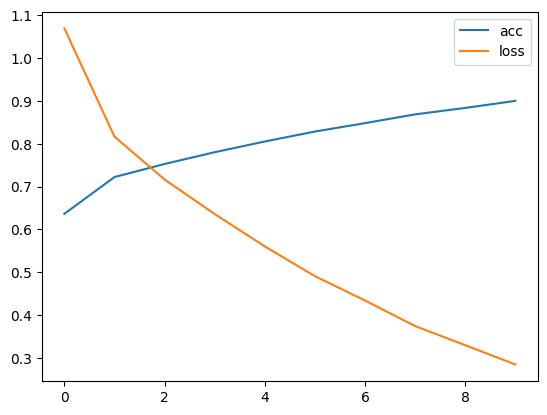

In [75]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

plt.plot(range(len(acc)),acc,label='acc')
plt.plot(range(len(loss)),loss,label='loss')
plt.legend()

In [76]:
model.evaluate(X_val,y_val)

469/469 [==============================] - 2s 3ms/step - loss: 1.0759 - acc: 0.7349


[1.0759201049804688, 0.7349333167076111]

### 레이어 제한 X (데이터가 많을 때는 모든 레이어 학습하는 것이 나음) , epochs = 50

In [85]:
# 데이터 적을 경우 => 전이 학습된 가중치들 동결하는 것이 좋음
# 데이터 많을 경우 => 모든 가중치를 전부 재학습하는 것이 좋음
# 무조건 Fine Tunning (전이학습) 한다고 해서 분류기만 재학습 시키는 것 이 좋은 것은 아님

In [78]:
vgg16 = VGG16(weights='imagenet',input_shape=(32,32,3),include_top=False)

In [79]:
# for layer in vgg16.layers[:-3]:
#   layer.trainable = False

In [80]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [81]:
model.compile(optimizer=Adam(lr=1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [82]:
history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1094/1094 [==============================] - 17s 9ms/step - loss: 2.0384 - acc: 0.1702
Epoch 2/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.8205 - acc: 0.2457
Epoch 3/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.6685 - acc: 0.3177
Epoch 4/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.5071 - acc: 0.3835
Epoch 5/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.4007 - acc: 0.4249
Epoch 6/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.4487 - acc: 0.4745
Epoch 7/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.6958 - acc: 0.3169
Epoch 8/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.3399 - acc: 0.4848
Epoch 9/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.1634 - acc: 0.5686
Epoch 10/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.0525 - acc: 0.6153
Epoch 11/50
1094/10

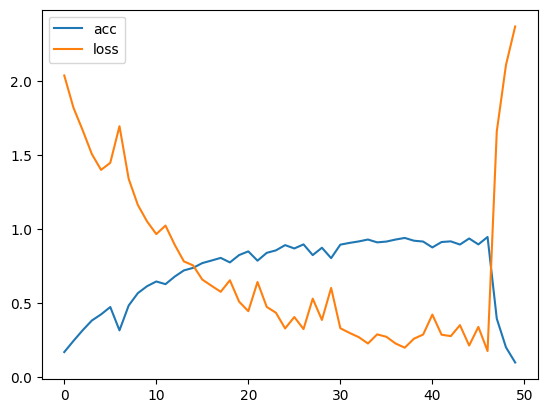

In [83]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
plt.plot(range(len(acc)),acc,label='acc')
plt.plot(range(len(loss)),loss,label='loss')
plt.legend()

In [84]:
model.evaluate(X_val,y_val)

469/469 [==============================] - 2s 3ms/step - loss: 2.3143 - acc: 0.1004


[2.314272403717041, 0.10040000081062317]

### 레이어 제한 X (데이터가 많을 때는 모든 레이어 학습하는 것이 나음) , epochs = 25

In [129]:
vgg16 = VGG16(weights='imagenet',input_shape=(32,32,3),include_top=False)

In [130]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [131]:
model.compile(optimizer=Adam(lr=1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [132]:
history = model.fit(X_train,y_train,epochs=30,batch_size=2042)

Epoch 1/30
18/18 [==============================] - 7s 74ms/step - loss: 2.3133 - acc: 0.1028
Epoch 2/30
18/18 [==============================] - 1s 73ms/step - loss: 2.2943 - acc: 0.1153
Epoch 3/30
18/18 [==============================] - 1s 73ms/step - loss: 2.2330 - acc: 0.1379
Epoch 4/30
18/18 [==============================] - 1s 73ms/step - loss: 2.1320 - acc: 0.1758
Epoch 5/30
18/18 [==============================] - 1s 73ms/step - loss: 2.0312 - acc: 0.1969
Epoch 6/30
18/18 [==============================] - 1s 73ms/step - loss: 1.8996 - acc: 0.2215
Epoch 7/30
18/18 [==============================] - 1s 73ms/step - loss: 1.8681 - acc: 0.2291
Epoch 8/30
18/18 [==============================] - 1s 73ms/step - loss: 1.7892 - acc: 0.2614
Epoch 9/30
18/18 [==============================] - 1s 73ms/step - loss: 1.9343 - acc: 0.1979
Epoch 10/30
18/18 [==============================] - 1s 72ms/step - loss: 1.8195 - acc: 0.2264
Epoch 11/30
18/18 [==============================] - 1s 73m

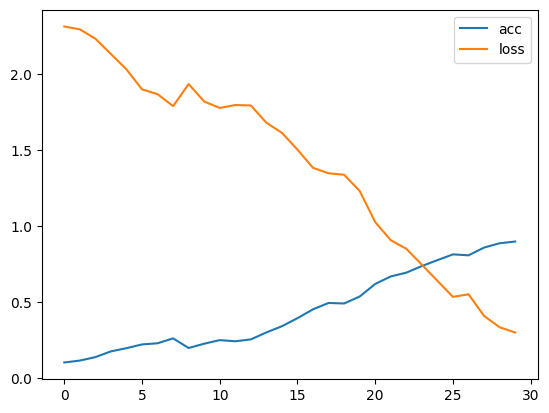

In [133]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
plt.plot(range(len(acc)),acc,label='acc')
plt.plot(range(len(loss)),loss,label='loss')
plt.legend()

In [134]:
model.evaluate(X_val,y_val)

469/469 [==============================] - 2s 3ms/step - loss: 0.8671 - acc: 0.7602


[0.8671364784240723, 0.760200023651123]

# Resnet 으로 분류

### Layer 3개 추가

In [45]:
from tensorflow.keras.applications.resnet50 import ResNet50

resnet50 = ResNet50(input_shape=(32,32,3),include_top=False,weights='imagenet')
resnet50

94765736/94765736 [==============================] - 0s 0us/step


In [46]:
for layer in resnet50.layers[:-3]:
  layer.trainable = False

In [48]:
model = Sequential()

model.add(resnet50)
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten_4 (Flatten)         (None, 2048)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)              2098176   
                                                                 
 dense_13 (Dense)            (None, 512)               524800    
                                                                 
 dense_14 (Dense)            (None, 10)                5130      
                                                                 
Total params: 26,215,818
Trainable params: 2,632,202
Non-trainable params: 23,583,616
_________________________________________________________________


In [50]:
model.compile(optimizer=Adam(lr=1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [52]:
history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.6330 - acc: 0.4195
Epoch 2/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.5568 - acc: 0.4452
Epoch 3/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.4968 - acc: 0.4642
Epoch 4/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.4419 - acc: 0.4872
Epoch 5/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.3827 - acc: 0.5079
Epoch 6/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.3294 - acc: 0.5263
Epoch 7/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.2693 - acc: 0.5488
Epoch 8/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.2092 - acc: 0.5703
Epoch 9/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.1535 - acc: 0.5914
Epoch 10/50
1094/1094 [==============================] - 9s 8ms/step - loss: 1.0965 - acc: 0.6086
Epoch 11/50
1094/1094 [======

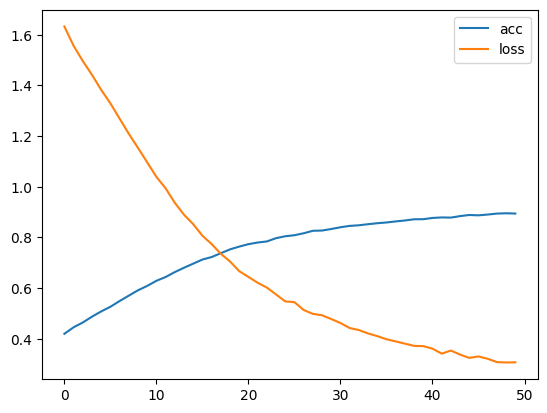

In [53]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']


plt.plot(range(len(acc)),acc,label='acc')
plt.plot(range(len(loss)),loss,label='loss')
plt.legend()

In [54]:
model.evaluate(X_val,y_val)

469/469 [==============================] - 4s 7ms/step - loss: 4.6096 - acc: 0.4210


[4.609646797180176, 0.42100000381469727]

### 레이어 6개 추가

In [55]:
from tensorflow.keras.applications.resnet50 import ResNet50

resnet50 = ResNet50(input_shape=(32,32,3),include_top=False,weights='imagenet')

In [56]:
for layer in resnet50.layers[:-6]:
  layer.trainable = False

In [57]:
model = Sequential()

model.add(resnet50)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [58]:
model.compile(optimizer=Adam(lr=1e-4),loss='sparse_categorical_crossentropy',metrics=['acc'])

history = model.fit(X_train,y_train,epochs=50)

Epoch 1/50
1094/1094 [==============================] - 17s 10ms/step - loss: 1.8973 - acc: 0.3137
Epoch 2/50
1094/1094 [==============================] - 11s 10ms/step - loss: 1.6981 - acc: 0.3965
Epoch 3/50
1094/1094 [==============================] - 10s 10ms/step - loss: 1.6116 - acc: 0.4293
Epoch 4/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.5486 - acc: 0.4533
Epoch 5/50
1094/1094 [==============================] - 11s 10ms/step - loss: 1.4936 - acc: 0.4720
Epoch 6/50
1094/1094 [==============================] - 10s 10ms/step - loss: 1.4445 - acc: 0.4927
Epoch 7/50
1094/1094 [==============================] - 10s 10ms/step - loss: 1.4011 - acc: 0.5068
Epoch 8/50
1094/1094 [==============================] - 10s 10ms/step - loss: 1.3550 - acc: 0.5191
Epoch 9/50
1094/1094 [==============================] - 10s 10ms/step - loss: 1.3160 - acc: 0.5357
Epoch 10/50
1094/1094 [==============================] - 10s 9ms/step - loss: 1.2748 - acc: 0.5499
Epoch 11/50

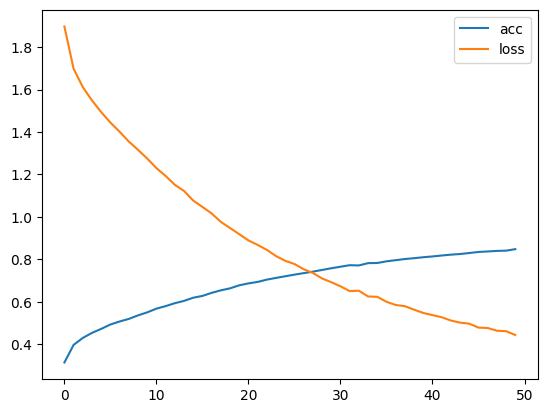

In [59]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']

plt.plot(range(len(acc)),acc,label='acc')
plt.plot(range(len(loss)),loss,label='loss')
plt.legend()

In [60]:
model.evaluate(X_val,y_val)

469/469 [==============================] - 4s 7ms/step - loss: 2.4540 - acc: 0.4511


[2.454002618789673, 0.4511333405971527]